##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 4 Report

## Group Members:

Gokul Gopakumar, Ewan Lister
## Group Name for Leaderboard: 

The 21st St Homies


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

### Exercise 1: Construct Dictionaries from Data

<img src="lab4_exercise1.png" width="1000">

In [158]:
def convert_csv_to_dict(file_path):
    
    # YOUR CODE HERE
    # Section 1.1 and 2.3 of Lab4_Lecture_Examples.ipynb might be helpful
    file_name = ''
    if '/' in file_path:
        directories = file_name.split('/')
        file_name = directories[-1]
    else:
        file_name = file_path
    
    print(file_name)
    file = pd.read_csv(file_path)
    file_np = file.to_numpy()
    dict_object = {
        "Filename" : file_path
        
    }
    
    i = 0
    for name in file.columns:
            dict_object[name] = file_np[:,i]
            i = i + 1
    
    return dict_object


In [159]:
TSLA_dict = convert_csv_to_dict('TSLA.csv')

TSLA.csv


In [160]:
# Navigate to keys corresponding to 2nd and 4th columns (Open and Low prices) of TSLA.csv, 
# Print first 10 elements of each key.

TSLA_column2 = "Open"
TSLA_column4 = "Low"
print(TSLA_dict[TSLA_column2][:10])
print(TSLA_dict[TSLA_column4][:10])

[19.0 25.790001 25.0 23.0 20.0 16.4 16.139999 17.58 17.950001 17.389999]
[17.540001 23.299999 20.27 18.709999 15.83 14.98 15.57 16.549999 17.0 16.9]


In [161]:
diabetes_dict = convert_csv_to_dict('diabetes.csv')

diabetes.csv


In [162]:
# Navigate to keys corresponding to 2nd and 4th columns (Glucose and SkinThickness) of diabetes.csv, 
# Print first 10 elements of each key.

diabetes_column2 = "Glucose"
diabetes_column4 = "SkinThickness"
print(diabetes_dict[diabetes_column2][:10])
print(diabetes_dict[diabetes_column4][:10])

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125.]
[35. 29.  0. 23. 35.  0. 32.  0. 45.  0.]


### Exercise 2: Bar graph with confidence intervals

<img src="lab4_exercise2.png" width="1000">

In [192]:
# Load diabetes.csv 
# Split the data into diabetic and non-diabetic

diabetes = pd.read_csv('diabetes.csv')

# YOUR CODE HERE

dia_dict = diabetes.to_dict()

# we should iterate through the keys in the diabetes dictionary,
# if for a given list attached to the key, the diabetes indicator is 0
diabetic_dict = {}
non_diabetic_dict = {}


print(dia_dict.keys())
for key in dia_dict.keys():
    diabetic_dict[key] = []
    non_diabetic_dict[key] = []


for i in range(len(dia_dict['Outcome'])):
    for name in dia_dict.keys():
        if dia_dict['Outcome'][i] == 1:
            diabetic_dict[name].append(dia_dict[name][i])
        else:
            non_diabetic_dict[name].append(dia_dict[name][i])


dict_keys(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])


In [193]:
# Extract glucose, blood pressure, and BMI metrics from diabetic and non-diabetic

# non-diabetic metrics
non_diabetic_glucose = non_diabetic_dict['Glucose']
non_diabetic_bp = non_diabetic_dict['BloodPressure']
non_diabetic_bmi = non_diabetic_dict['BMI']

# diabetic metrics
diabetic_glucose = diabetic_dict['BMI']
diabetic_bp = diabetic_dict['BMI']
diabetic_bmi = diabetic_dict['BMI']

non_diabetic_list = [non_diabetic_glucose, non_diabetic_bp, non_diabetic_bmi]
diabetic_list = [diabetic_glucose, diabetic_bp, diabetic_bmi]

non_diabetic_bar_labels = ['non_diabetic_glucose', 'non_diabetic_bp', 'non_diabetic_bmi']
diabetic_bar_labels = ['diabetic_glucose', 'diabetic_bp', 'diabetic_bmi']

In [194]:
def produce_bargraph_CI(data_vec_list, conf_level, bar_labels):
    
    # YOUR CODE HERE 
    # THE FUNCTION SHOULD OUTPUT THE PLOT
    # MAKE SURE YOUR LABELS (bar labels, plot titles are large enough
    
    #Get averages
    means = []
    h = []
    for data in data_vec_list:
        means.append(sum(data)/len(data))
        #Determining confidence interval size
        CI_lower, CI_upper = st.t.interval(alpha=conf_level, df=len(data)-1, 
                                      loc=np.mean(data), scale=st.sem(data))
        h.append(CI_upper - np.mean(data)) # Confidence interval size
    
    
    
    fig = plt.figure(figsize=(20,10))
    plt.bar(bar_labels, means, color = 'blue', yerr = h)
    plt.xticks(fontsize=20, rotation = 90) # rotation takes degree values to rotate the x-ticks
    plt.yticks(fontsize=20)
    plt.ylim(0, 150)
    return

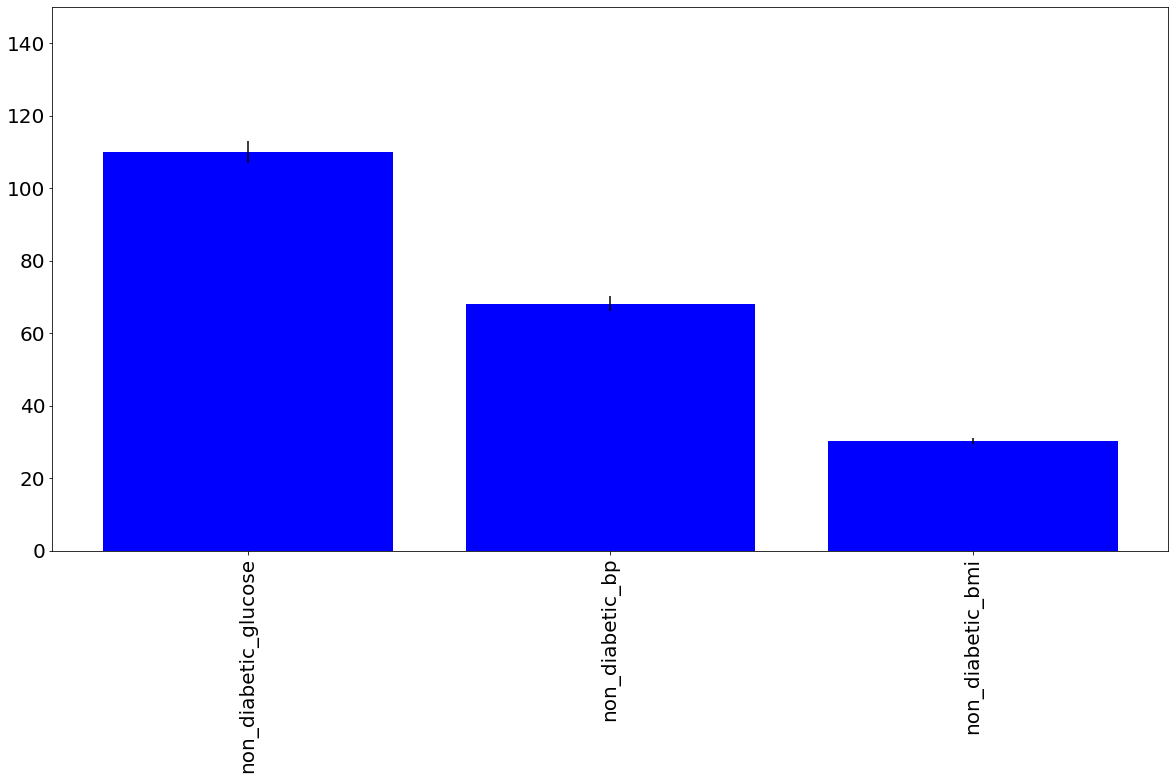

In [195]:
produce_bargraph_CI(data_vec_list = non_diabetic_list, conf_level = 0.99, bar_labels = non_diabetic_bar_labels)

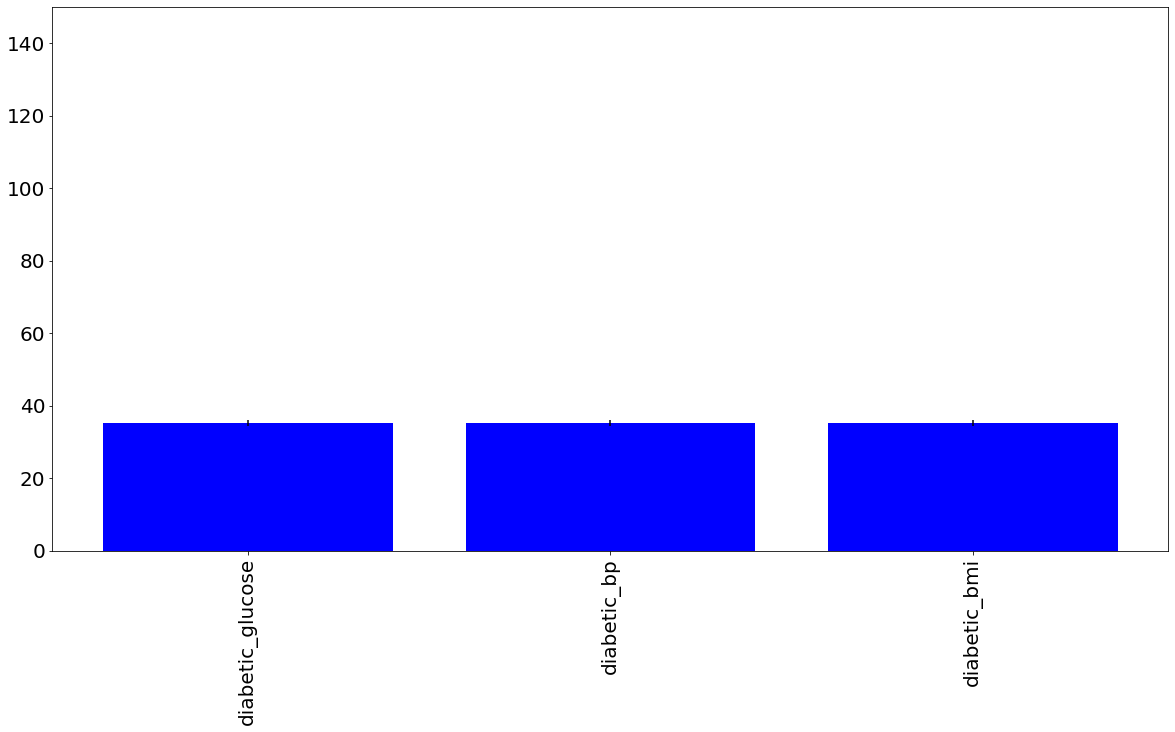

In [196]:
produce_bargraph_CI(data_vec_list = diabetic_list, conf_level = 0.95, bar_labels = diabetic_bar_labels)

### Exercise 3: Rolling Mean/Median Function from Scratch

<img src="lab4_exercise3.png" width="1000">

In [69]:
# Load stock datasets

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

google = pd.read_csv('GOOGL.csv') 
google_np = google.to_numpy()

dji = pd.read_csv('DJI.csv') 
dji_np = dji.to_numpy()

In [70]:
# Extract closing price for each stock data

tesla_np_closing = tesla_np[:, 4]
google_np_closing = google_np[:, 4]
DJI_np_closing = dji_np[:, 4]

In [73]:
def smooth_data(data_arr, smooth_type, window_size):
    
    # YOUR CODE HERE
    
    arr = np.zeros(len(data_arr))
    
    if smooth_type == 'mean':
        for i in range(len(arr)):
            section = data_arr[i:i + window_size]
            arr[i] = np.mean(section)        
    else:
        for i in range(len(arr)):
            section = data_arr[i:i + window_size]
            arr[i] = np.median(section)
    return arr


In [75]:
# Tesla closing prices, smooth_type = 'mean', window_size = 100
# Note your smoothed data will be shorter than the original

smoothed_tsla_closing  = smooth_data(tesla_np_closing, smooth_type = 'mean', window_size = 100)

[ 20.98790004  21.04790004  21.11950004 ... 244.38       249.5650025
 255.029999  ]


Text(0, 0.5, 'Closing Price')

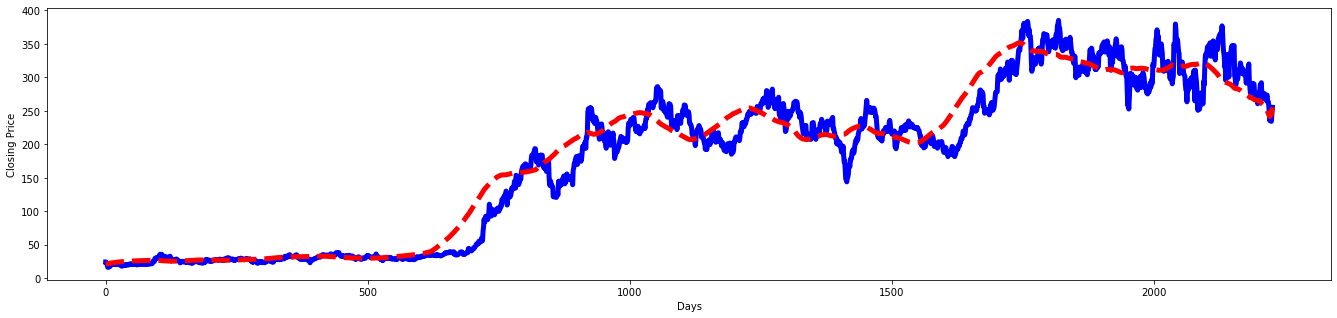

In [92]:
# plot smoothed_tsla_closing on top of tesla_np_closing

# YOUR CODE HERE
fig = plt.figure(figsize=(23,5))

plt.plot(tesla_np_closing, 'b-', linewidth = 5)
plt.plot(smoothed_tsla_closing, 'r--', linewidth = 5)
plt.xlabel('Days')
plt.ylabel('Closing Price')


In [87]:
# Google closing prices, smooth_type = 'median', window_size = 150
# Note your smoothed data will be shorter than the original

smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

Text(0, 0.5, 'Closing Price')

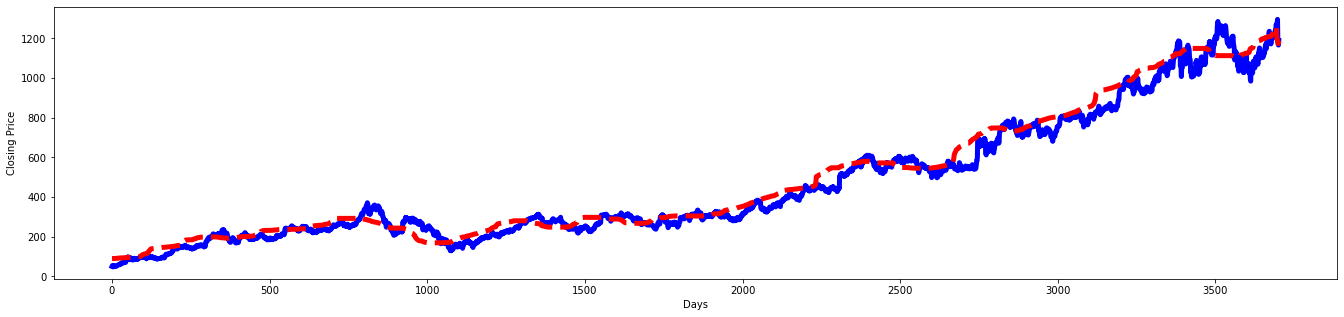

In [93]:
# plot smoothed_google_closing on top of google_np_closing

# YOUR CODE HERE
fig = plt.figure(figsize=(23,5))

plt.plot(google_np_closing, 'b-', linewidth = 5)
plt.plot(smoothed_google_closing, 'r--', linewidth = 5)
plt.xlabel('Days')
plt.ylabel('Closing Price')

In [89]:
# Dow Jones Index closing prices, smooth_type = 'mean', window_size = 200
# Note your smoothed data will be shorter than the original

smoothed_dji_closing  = smooth_data(DJI_np_closing, smooth_type = 'mean', window_size = 200)

Text(0, 0.5, 'Closing Price')

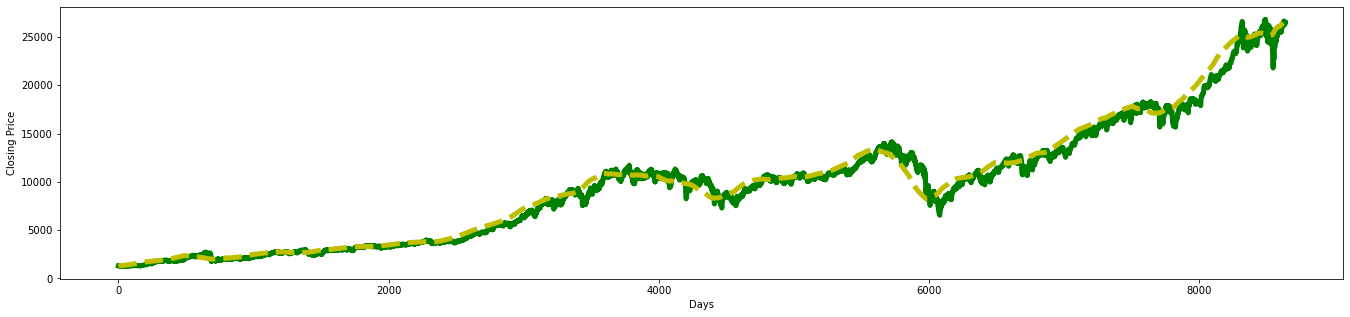

In [94]:
# plot smoothed_dji_closing on top of dji_np_closing

# YOUR CODE HERE
fig = plt.figure(figsize=(23,5))

plt.plot(DJI_np_closing, 'g-', linewidth = 5)
plt.plot(smoothed_dji_closing, 'y--', linewidth = 5)
plt.xlabel('Days')
plt.ylabel('Closing Price')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 50ms

In [91]:
timeit -n 1 -r 7 smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

168 ms ± 8.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 4: Ranking Daily Stock Surges/Crashes

<img src="lab4_exercise4.png" width="1000">

In [152]:
def detect_surge_crash(filepath, detect_type, num_output_dates):
    
    # YOUR CODE HERE
    # Lab 2 slide 24 might come useful
    
    stock_price = convert_csv_to_dict(filepath)

    # Creating indicator for crash or surge
    
    stock_movements = {}
    for i in range(len(stock_price['Close'])):
        difference = stock_price['Close'][i] - stock_price['Open'][i]
        indicator = difference >= 0
        d_type = detect_type == 'surge'
        if not ((d_type and not indicator) or (not d_type and indicator)):
            stock_movements[stock_price['Date'][i]] = difference
    
    if detect_type == 'surge':
        sorted_age = sorted(stock_movements.items(), key = lambda x:x[1], reverse = True)
    else:
        sorted_age = sorted(stock_movements.items(), key = lambda x:x[1])
    
    date = []
    price_change = []
    
    for group in sorted_age:
        date.append(group[0])
        price_change.append(group[1])
        
    date_list = date[0:num_output_dates]
    price_change_list = price_change[0:num_output_dates]
    return date_list, price_change_list

In [153]:
date_list_t, price_change_list_t = detect_surge_crash(filepath = 'TSLA.csv', detect_type = 'surge', num_output_dates = 5)

TSLA.csv


In [154]:
print(date_list_t, price_change_list_t)

['2018-08-07', '2018-04-04', '2018-10-23', '2018-12-26', '2018-10-26'] [35.73001099999999, 34.16000299999999, 30.270019999999988, 26.089995999999985, 22.649993999999992]


In [148]:
date_list_g, price_change_list_g = detect_surge_crash(filepath = 'GOOGL.csv', detect_type = 'crash', num_output_dates = 7)

GOOGL.csv
-61.81005899999991


In [149]:
print(date_list_g, price_change_list_g)

['2018-10-29', '2018-10-24', '2018-03-27', '2018-02-08', '2018-12-04', '2018-10-10', '2018-12-21'] [-61.81005899999991, -57.88000499999998, -56.96002199999998, -52.159973000000036, -50.52001900000005, -44.239990000000034, -40.79003899999998]


## Extra credit: Code efficiency
### Achieve a runtime speed of < 10ms

In [ ]:
timeit -n 1 -r 7 date_list_t, price_change_list_t = detect_surge_crash(filepath = path to TSLA.csv, detect_type = 'surge', num_output_dates = 5)

### Exercise 5: Human Debugger

<img src="lab4_exercise5.png" width="1200">

### Faulty function #1 

In [ ]:
def average_data_per_col(arr_2d):
    
    # NOTE FROM YOUR FRIEND PREPARING FOR STARBUCKS SOFTWARE ENGINEER TECH INTERVIEW 
    """  The function takes numpy 2d array as an input, computes mean for each column data, and outputs 1D array 
         with the length equal to the # of columns.
         
         For some reason I keep getting errors.... I need your help to debug the code.
         I need this position so I can get free ice lattes... :(
    
    """
    
    # placeholder for averaged values
    averaged_data = ()
    
    # Loop through each column data to compute mean and append to averaged_data 
    for k in range(len(arr_2d[:, 0])):
        
        averaged_column_data = np.mean(arr_2d[:, k])
        averaged_data.append(averaged_column_data)
        
    # Return numpy array form of the averaged_data
    return np.array(averaged_data)

In [ ]:
# Load diabetes.csv and convert to numpy array

diabetes = pd.read_csv('diabetes.csv')
diabetes_np = diabetes.to_numpy()

In [ ]:
# Run faulty function 1

averaged_diabetic_attributes =  average_data_per_col(diabetes_np)

In [ ]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def average_data_per_col_fixed(arr_2d):
    
    # YOUR CODE HERE
        
    return 

In [ ]:
# Test your fixed function

averaged_diabetic_attributes =  average_data_per_col_fixed(diabetes_np)

In [ ]:
# Compare with correct results

correct_result_func1 = np.load('E5_correct_output_1.npy')

# Should return True if the result is correct
np.sum(np.round(correct_result_func1, 3) == np.round(averaged_diabetic_attributes, 3)) == len(correct_result_func1) 

### Faulty function #2

In [ ]:
def daily_stock_change_2_normalized_percentage(opening_price_arr, closing_price_arr):
    
    # NOTE FROM YOUR FRIEND WHO INVESTED IN TESLA
    """  I want to write a function which takes 2 1D numpy arrays of each corresponding to opening/closing prices of stock
         and output 1D array of daily stock change in percentages. 
         
         I want the percentages scale to be in a scale such that 1 = 100%, -0.5 = -50%, 1.5 = 150%  etc.
         For example, day 1 opening: $10, day 1 closing: $15, change in scaled percecntage: 0.5.
         
         I am not really getting errors but the numbers don't look right... Can you help me?? :'( 
    
    """
    
    # placeholder for change percentage values
    change_percentages = np.zeros(len(opening_price_arr), dtype = 'int')
    
    # Loop through each opening/closing price to compute the change percentage
    for date_num in range(len(opening_price_arr)):
        
        change_percentages[date_num] = opening_price_arr[date_num] - closing_price_arr[date_num] / opening_price_arr[date_num]
    
    return change_percentages

In [ ]:
# Load tsla.csv and convert to numpy array

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

In [ ]:
# Run faulty function 2

change_percentages = daily_stock_change_2_normalized_percentage(tesla_np[:, 1], tesla_np[:, 4])
print(change_percentages)

In [ ]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def daily_stock_change_2_normalized_percentage_fixed(opening_price_arr, closing_price_arr):
    
    # YOUR CODE HERE
    
    return change_percentages

In [ ]:
# Test your fixed function

change_percentages = daily_stock_change_2_normalized_percentage_fixed(tesla_np[:, 1], tesla_np[:, 4])
print(change_percentages)

In [ ]:
# Compare with correct results

correct_result_func2 = np.load('E5_correct_output_2.npy')

# Should return True if the result is correct
np.sum(np.round(correct_result_func2, 3) == np.round(change_percentages, 3)) == len(correct_result_func2) 

### Faulty function #3

In [ ]:
def subset_diabetes_by_age(diabetes_data):
    
    # NOTE FROM YOUR FRIEND WHO WORKS AT UW IHME
    """ The function takes diabetes pandas data frame as an input and outputs a subplot of 3 x 1 with three histograms.    
    
        Specifically, I want to divide the diabetes data into three age groups - 
            1. 20 to 40
            2. 40 to 60
            3. 60 to 80
            
        and plot 3 histograms of glucose distribution (50 bins per histogram) in 3 x 1 python subplots.
        
        I seem to be getting error from very beginning even before I divide the dataset....
        My coworkers at IHME prefer R rather than Python... so you are my only hope!  
    
    """
    
    # Extract the age column of the diabetes_data 
    age_column = diabetes_data[:, 8] 
    
    # Construct boolean mask for each age group 
    age_20_40_bool_mask = age_column > 20 + age_column < 40
    age_40_60_bool_mask = age_column > 40 + age_column < 60
    age_60_80_bool_mask = age_column > 60 + age_column < 80
    
    # Get glucose data for each age group via applying the boolean mask for each age group
    age_20_40_glucose = diabetes_data[age_20_40_bool_mask, 2]
    age_40_60_glucose = diabetes_data[age_40_60_bool_mask, 2]
    age_60_80_glucose = diabetes_data[age_60_80_bool_mask, 2]
    
    # Plot the histogram for each age group in 3 x 1 subplot
    fig = plt.figure(figsize=(15,7))
    
    plt.subplot(3,1,1)
    
    plt.hist(age_20_40_glucose, bins = 50)
    plt.title('Age 20 to 40', fontsize = 15)
    
    plt.subplot(3,1,2)
    
    plt.hist(age_40_60_glucose, bins = 50)
    plt.title('Age 40 to 60', fontsize = 15)
    
    plt.subplot(3,1,3)
    
    plt.hist(age_60_80_glucose, bins = 50)
    plt.title('Age 60 to 80', fontsize = 15)
    
    plt.tight_layout()
    
    plt.show()

In [ ]:
# Load diabetes.csv as pandas dataframe

diabetes = pd.read_csv('diabetes.csv')

In [ ]:
# Run faulty function 3

subset_diabetes_by_age(diabetes_data = diabetes)

In [ ]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def subset_diabetes_by_age_fixed(diabetes_data):
    
    # YOUR CODE HERE
    

In [ ]:
# Test your fixed function
# Compare your plot with the correct plot provided in template folder

subset_diabetes_by_age_fixed(diabetes_data = diabetes)